# Analyzing Thanksgiving
The project came from the DataQuest mission [Guided Project: Analyzing Thanksgiving Dinner](https://www.dataquest.io/m/219/guided-project-analyzing-thanksgiving-dinner).
The dataset came from [FiveThirtyEight](https://www.fivethirtyeight.com/), and can be found [here](https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015). 

### The challenge:
Determine how many respondents had no pies, how many had 1 pie, how many had 2, and so on.  The processing for pies will be repeated for desserts.

### The data:

The data for pies and desserts are stored in multiple columns, one for each type of pie (apple, pumpkin, sweet potato, etc), as well as a "None" and two "Other" columns.  Desserts follow the same format.  If a respondent chose a pie or dessert, the name ("Apple", "Pumpkin", "Brownies") is stored for that pie/desseert and that respondent.

### Filtering and Factoring

The first step was to only use the questions about pies and deserts.  I created a new CSV file with all the questions and added a Subcategory column.  This way I could easily find just the questions I was looking for.  The next step was to convert pie and dessert names into counts.  This was done in the functions *calc\_pie\_counts* and *calc\_dessert\_counts*.  Please see the cell documentation for more information.

### Graphing:

I chose side-by-side bar graphs to show the relative numbers of pies and desserts.

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


### Function to count pies:

    - For each respondent :
        - Loop through "pie questions"
            - get current question, split at '-' and strip out leading and trailing spaces
            - Response will be the pie_answer if the respondent chose that pie, NaN if not
            
        - pie_count now has a count of pies for this respondent, pop into variable
        - If our Dictionary already has this count, bump it by one; otherwise, set to 1 (standard Dictionary action)
        - Delete and rebuild the count Dictionary for the next respondent

In [2]:
#Function to count pies
def calc_pie_counts(pie_quest_count, pie_questions, data, num_responses):
    pie_count = {"all_pies":0}  # Create a single item Dictionary
    
    # For each respondent :
    for data_idx in range (num_responses):
        # Loop through "pie questions"
        for idx in range(pie_quest_count):
            # get current question, split at '-' and strip out leading and trailing spaces
            row = pie_questions.iloc[idx] 
            next_ques = row[2]
            all_the_words = next_ques.split('-')
            pie_answer = all_the_words[-1]  # the last word of the question is the response
            pie_answer = pie_answer.strip(' ')
            # Response will be the pie_answer if the respondent chose that pie, NaN if not
            response = data[next_ques].iloc[data_idx]
            if str(response) == pie_answer:
                pie_count["all_pies"] += 1

        # pie_count now has a count of pies for this respondent, pop into variable
        pies_for_resp =  pie_count['all_pies']
        
        # If our Dictionary already has this count, bump it by one; otherwise, set to 1 (standard Dictionary action)
        if pies_for_resp in pie_dict:
            pie_dict[pies_for_resp] += 1
        else:
            pie_dict[pies_for_resp] = 1
            
        # Delete and rebuild the count Dictionary for the next respondent
        del pie_count["all_pies"]
        pie_count = {"all_pies":0}

In [3]:
# Repeat function for desserts
def calc_dessert_counts(dessert_quest_count, dessert_questions, data, num_responses):
    dessert_count = {"all_desserts":0}
    for data_idx in range (num_responses):
        for idx in range(dessert_quest_count):
            row = dessert_questions.iloc[idx] 
            next_ques = row[2]
            all_the_words = next_ques.split('-')
            dessert_answer = all_the_words[-1]  # the last word of the question is the response
            dessert_answer = dessert_answer.strip(' ')
            response = data[next_ques].iloc[data_idx]
            if str(response) == dessert_answer:
                dessert_count["all_desserts"] += 1

        desserts_for_resp =  dessert_count['all_desserts']
        if desserts_for_resp in dessert_dict:
            dessert_dict[desserts_for_resp] += 1
        else:
            dessert_dict[desserts_for_resp] = 1
        del dessert_count["all_desserts"]
        dessert_count = {"all_desserts":0}



### Actual processing starts here

- Read the main data file and the list of Subcategories


In [4]:
#Read the main data file and the list of Subcategories
data = pd.read_csv(r"G:\Python34\Projects\Thanksgiving\thanksgiving.csv", encoding="Latin-1")
question_list = pd.read_csv(r"G:\Python34\Projects\Thanksgiving\thanksgiving questions.csv")

### Count how many responders had how many pies and desserts

- Get only the "Pie Questions"
- Use the function above to get counts and numbers
- Transform into Lists for graphing

- Repeat for desserts

In [5]:
# Count the number of pies for each respondent, then get how many respondents had how many pies
pie_questions = question_list[question_list["Subcategory"]== "Pie"]
pie_quest_count = len(pie_questions) - 3 #  Skip "Other" and "None"
num_responses = len(data["RespondentID"])

# Create an empty Dictionary of counts and numbers
pie_dict = {}

# Let the function do the work
dmmy_val = calc_pie_counts(pie_quest_count, pie_questions, data, num_responses)

# Transform into to Lists for graphing
pie_count_list = []
pie_num_list = []

for key, value in sorted(pie_dict.items(), key=lambda k: k):
    pie_count_list.append(key)
    pie_num_list.append(value)

In [6]:
#Repeat for desserts

dessert_questions = question_list[question_list["Subcategory"]== "Dessert"]
dessert_quest_count = len(dessert_questions) - 3 #  Skip "Other" and "None"
num_responses = len(data["RespondentID"])
dessert_dict = {}

dmmy_val = calc_dessert_counts(dessert_quest_count, dessert_questions, data, num_responses)

dessert_count_list = []
dessert_num_list = []

for key, value in sorted(dessert_dict.items(), key=lambda k: k):
    dessert_count_list.append(key)
    dessert_num_list.append(value)

### Show the data

- A bar graph shows the number of pies and desserts most cleanly

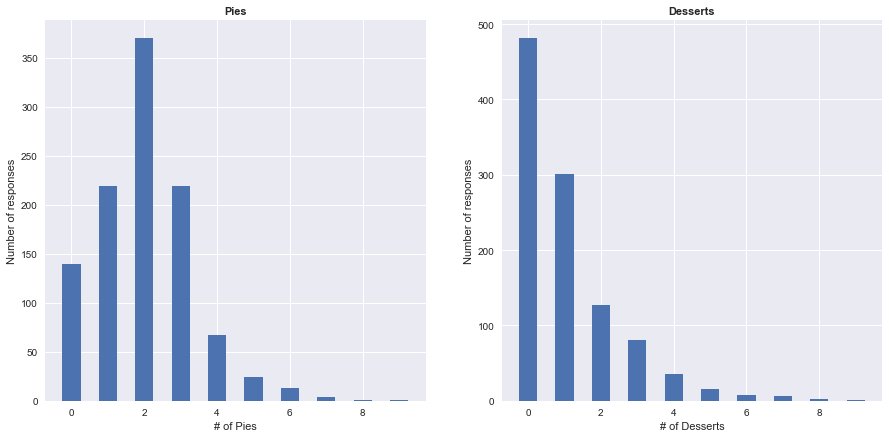

In [7]:
# Create graphs
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,7))
ind = np.arange(10)

# Set labels and title, and build bar graph of counts for pies
ax1 = fig.add_subplot(1,2,1)
ax1.set_ylabel('Number of responses')
ax1.set_xlabel('# of Pies')
ax1.set_title("Pies", weight="bold", fontsize=11)
ax1.bar(ind, pie_num_list, 0.5)

# Repeat for desserts
ax2 = fig.add_subplot(1,2,2)
ax2.set_ylabel('Number of responses')
ax2.set_xlabel('# of Desserts')
ax2.set_title("Desserts", weight="bold", fontsize=11)
ax2.bar(ind, dessert_num_list, 0.5)

plt.show()

### Conclusion:

Most people had 2 pies (which ones may be determined at a later date).  Few had 4 and hardly any had 5 or more.

Desserts are not near as popular as pies, with most respondents not having any desserts at all. Again, few had 4 desserts, and hardly any had 5 or more.